In [6]:
# std
import os
import sys
import inspect
import time
import pathlib
from math import sqrt
from math import log2
# packgaes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

## sklearn
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.DataParser import parse_superconductivity
from common.model_trainer_reg import *
from common.regression_plotfunctions import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

import supercon_preprocessing

In [7]:
df_raw = parse_superconductivity()

#df_raw = df_raw.sample(3000)
df_raw

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Train and Test

In [8]:
X, Y = supercon_preprocessing.preprocessing(df_raw, transform=True)

In [9]:
n_splits = 5
test_size = 0.3

## SGD-Regression

In [ ]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}


modeltrainer = ModelTrainer(MODEL, params, X, Y, thread_cnt=1)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(test_size = test_size)
modeltrainer.train()
results = modeltrainer.retResults(PATH + "sklearn_TTS_SGD.csv")
display(results)
############ shuffle_Cross validation  ###################
modeltrainer.CV_shuffle_split(k = n_splits, test_size = test_size, random_state = 42)
results = modeltrainer.retResults(PATH + "sklearn_CV_SGD.csv")
display(results)

## My SGD-Regression

In [ ]:
MODEL = LinearRegression
params = {"alpha" : [0.0001], "max_iter": [1000]}

modeltrainer = ModelTrainer(MODEL, params, X, Y, thread_cnt=1)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(test_size = test_size)
modeltrainer.train()
results = modeltrainer.retResults(PATH + "my_TTS_SGD.csv")
display(results)
############ shuffle_Cross validation  ###################
modeltrainer.CV_shuffle_split(k = n_splits, test_size = test_size, random_state = 42)
results = modeltrainer.retResults(PATH + "my_CV_SGD.csv")
display(results)

## KNN-Regression

In [11]:
MODEL = KNeighborsRegressor
params = {
    "weights" : ["uniform"],
    "algorithm": ["brute", "kd_tree", "ball_tree"]
}
NAME = "KNN"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, thread_cnt=1)
############ shuffle_Cross validation  ###################
modeltrainer.CV_shuffle_split(k = n_splits, test_size = test_size, random_state = 42)
results = modeltrainer.retResults(PATH + "sklearn_CV_KNN.csv")
display(results)

Using CV with k={k} folds.
Training all model variations took 11.4464s - CV fold # =1
Training all model variations took 11.5322s - CV fold # =2
Training all model variations took 12.2115s - CV fold # =3
Training all model variations took 10.8246s - CV fold # =4
Training all model variations took 11.6880s - CV fold # =5


,weights,algorithm,train_time,inference_time,k,R2_score,RMSE,D,N,n_test,n_train
0,uniform,brute,0.001932,1.850902,1,0.897420,0.011699,81,21263,6379,14884
1,uniform,kd_tree,0.060038,1.795791,1,0.896693,0.011782,81,21263,6379,14884
2,uniform,ball_tree,0.055446,7.680163,1,0.896705,0.011781,81,21263,6379,14884
3,uniform,brute,0.001507,1.935205,2,0.890105,0.012360,81,21263,6379,14884
4,uniform,kd_tree,0.059868,1.716988,2,0.890227,0.012346,81,21263,6379,14884
5,uniform,ball_tree,0.053143,7.763523,2,0.890460,0.012320,81,21263,6379,14884
6,uniform,brute,0.001508,1.768611,3,0.892062,0.011966,81,21263,6379,14884
7,uniform,kd_tree,0.060704,1.694889,3,0.890588,0.012129,81,21263,6379,14884
8,uniform,ball_tree,0.054451,8.629228,3,0.890809,0.012104,81,21263,6379,14884
9,uniform,brute,0.001622,1.820946,4,0.889664,0.012377,81,21263,6379,14884


In [89]:
def dataset_size_experiment(
        subset_size=np.arange(0.1, 1.1, 0.1),
        path_csv=PATH+"sklearn_TTS_KNN_app.csv"
        ):
    results = []
    k = 1
    break_next = False
    for subs in subset_size:
        if subs < 1:
            n_train = int(subs * len(Y))
            print(f"{100*subs:.2f}% --> n_train={n_train}")
        else:
            n_train = subs
            print(f"{100*subs/len(Y):.2f}% --> n_train={n_train}")
        if break_next:
            break
        if n_train > len(Y):
            n_train = len(Y)
            break_next = True
        modeltrainer = ModelTrainer(MODEL, params, X[:n_train,:], Y[:n_train], thread_cnt=thread_cnt)
        modeltrainer.TTSplit(test_size = test_size)
        modeltrainer.k = k 
        modeltrainer.train()
        #print(modeltrainer.results)
        results.append(modeltrainer.results)
        k += 1
        print("-"*30)
    results = pd.concat(results, ignore_index=True)
    results.to_csv(path_csv, index=False)
    display(results)
    return results

In [66]:
MODEL = KNeighborsRegressor
params = {
    "weights" : ["uniform"],
    "algorithm": ["brute", "kd_tree", "ball_tree"]
}
NAME = "KNN"
PATH = "out/"+NAME+"/"
########### train with TrainTestSplit  ###################
thread_cnt = 4
results = dataset_size_experiment([20, 200, 400, 800, 1600, 3200, 6400, 12800, 16000, 25600] ,path_csv=PATH+"sklearn_TTS_KNN_app.csv")

20.00% --> n_train=20
Training all model variations took 1.8251s - CV fold # =1
------------------------------
200.00% --> n_train=200
Training all model variations took 1.5144s - CV fold # =2
------------------------------
400.00% --> n_train=400
Training all model variations took 1.4965s - CV fold # =3
------------------------------
800.00% --> n_train=800
Training all model variations took 1.4980s - CV fold # =4
------------------------------
1600.00% --> n_train=1600
Training all model variations took 1.5242s - CV fold # =5
------------------------------
3200.00% --> n_train=3200
Training all model variations took 1.6856s - CV fold # =6
------------------------------
6400.00% --> n_train=6400
Training all model variations took 2.3475s - CV fold # =7
------------------------------
12800.00% --> n_train=12800
Training all model variations took 4.0611s - CV fold # =8
------------------------------
16000.00% --> n_train=16000
Training all model variations took 5.3182s - CV fold # =9
--

,weights,algorithm,train_time,inference_time,k,R2_score,RMSE,D,N,n_test,n_train
0,uniform,brute,0.000612,0.001151,1,0.176378,0.000999,81,20,6,14
1,uniform,kd_tree,0.000799,0.001282,1,0.176378,0.000999,81,20,6,14
2,uniform,ball_tree,0.000692,0.001366,1,0.176378,0.000999,81,20,6,14
3,uniform,brute,0.000397,0.001144,2,0.617851,0.012100,81,200,60,140
4,uniform,kd_tree,0.000754,0.002054,2,0.617798,0.012102,81,200,60,140
5,uniform,ball_tree,0.000759,0.002070,2,0.617841,0.012101,81,200,60,140
6,uniform,brute,0.000950,0.002774,3,0.455425,0.016648,81,400,120,280
7,uniform,kd_tree,0.001730,0.004778,3,0.458888,0.016542,81,400,120,280
8,uniform,ball_tree,0.000942,0.004492,3,0.459232,0.016532,81,400,120,280
9,uniform,brute,0.000428,0.005375,4,0.482656,0.012520,81,800,240,560


Text(0.5, 1.0, 'D=81')

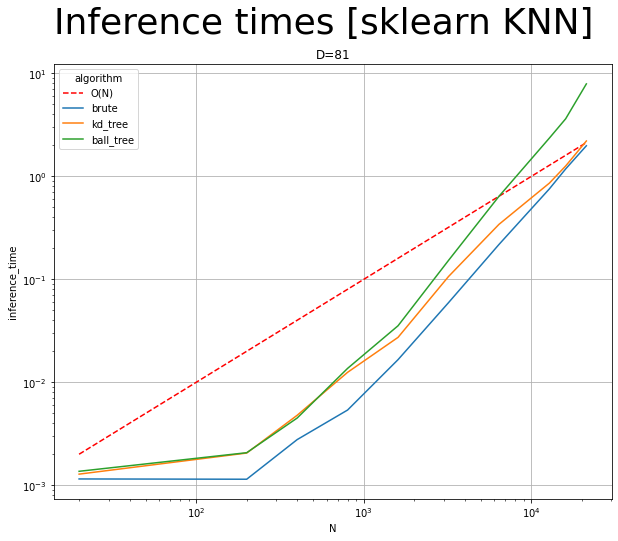

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
N = results["N"].to_numpy()
plt.plot(N, N*1e-4, ls="--", color="red",label="O(N)")
sns.lineplot(x="N", y="inference_time", hue="algorithm", data=results, ax=ax);
plt.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.suptitle("Inference times [sklearn KNN]", fontsize=36)
ax.set_title(f"D={D}")

Text(0.5, 1.0, 'D=81')

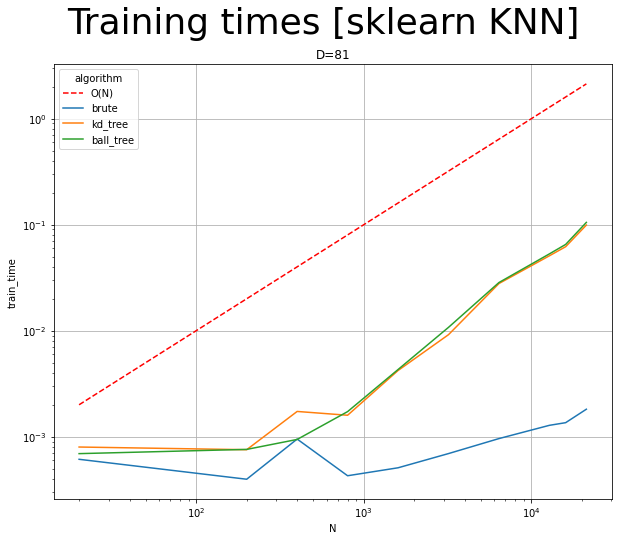

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
N = results["N"].to_numpy()
plt.plot(N, N*1e-4, ls="--", color="red",label="O(N)")
sns.lineplot(x="N", y="train_time", hue="algorithm", data=results, ax=ax);
plt.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.suptitle("Training times [sklearn KNN]", fontsize=36)
ax.set_title(f"D={D}")

In [88]:
MODEL = KNNRegressor
params = {"n_neighbors" : [5],
           "p": [2],
           "chunk_size": [1, 4]}
NAME = "KNN"
PATH = "out/"+NAME+"/"
########### train with TrainTestSplit  ###################
thread_cnt = 4
results = dataset_size_experiment([20, 200, 400, 800, 1600, 3200, 6400, 12800, 16000, 25600] ,path_csv=PATH+"my_TTS_KNN_app.csv")

20.00% --> n_train=20
Training all model variations took 1.4624s - CV fold # =1
------------------------------
200.00% --> n_train=200
Training all model variations took 1.3567s - CV fold # =2
------------------------------
400.00% --> n_train=400
Training all model variations took 1.3942s - CV fold # =3
------------------------------
800.00% --> n_train=800
Training all model variations took 1.3982s - CV fold # =4
------------------------------
1600.00% --> n_train=1600
Training all model variations took 1.4908s - CV fold # =5
------------------------------
3200.00% --> n_train=3200
Training all model variations took 2.0072s - CV fold # =6
------------------------------
6400.00% --> n_train=6400
Training all model variations took 4.6884s - CV fold # =7
------------------------------
12800.00% --> n_train=12800
Training all model variations took 14.0164s - CV fold # =8
------------------------------
16000.00% --> n_train=16000
Training all model variations took 20.8830s - CV fold # =9


,n_neighbors,p,chunk_size,train_time,inference_time,k,R2_score,RMSE,D,N,n_test,n_train
0,5,2,1,0.000004,0.000415,1,0.176378,0.000999,81,20,6,14
1,5,2,4,0.000005,0.000327,1,0.176378,0.000999,81,20,6,14
2,5,2,1,0.000005,0.003101,2,0.617851,0.012100,81,200,60,140
3,5,2,4,0.000005,0.002306,2,0.617851,0.012100,81,200,60,140
4,5,2,1,0.000005,0.008536,3,0.455432,0.016648,81,400,120,280
5,5,2,4,0.000005,0.007690,3,0.455432,0.016648,81,400,120,280
6,5,2,1,0.000006,0.025506,4,0.482656,0.012520,81,800,240,560
7,5,2,4,0.000006,0.026909,4,0.482656,0.012520,81,800,240,560
8,5,2,1,0.000005,0.089115,5,0.655715,0.010036,81,1600,480,1120
9,5,2,4,0.000005,0.109746,5,0.655715,0.010036,81,1600,480,1120


Text(0.5, 1.0, 'D=81')

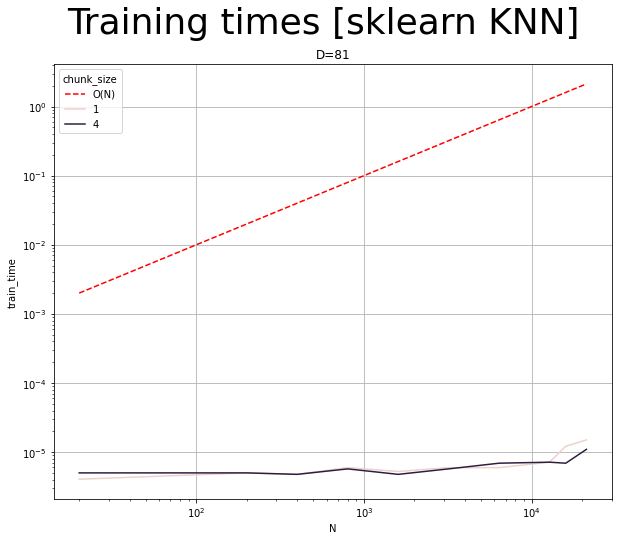

In [92]:
fig, ax = plt.subplots(figsize=(10,8))
N = results["N"].to_numpy()
plt.plot(N, N*1e-4, ls="--", color="red",label="O(N)")
sns.lineplot(x="N", y="train_time", hue="chunk_size", data=results, ax=ax);
plt.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.suptitle("Training times [sklearn KNN]", fontsize=36)
ax.set_title(f"D={D}")

Text(0.5, 1.0, 'D=81')

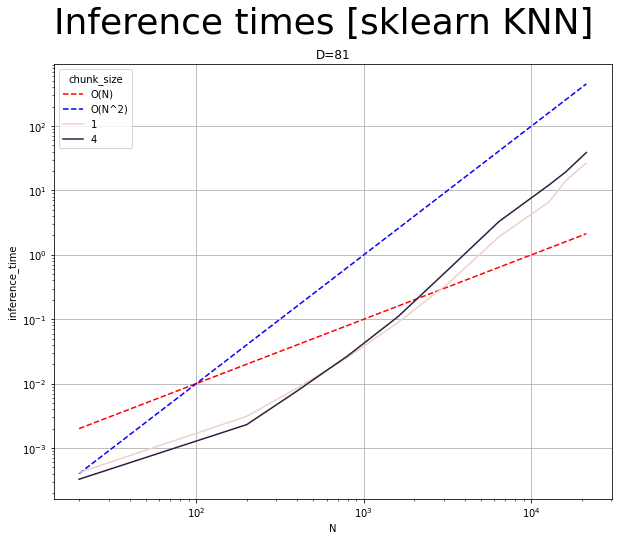

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
N = results["N"].to_numpy()
plt.plot(N, N*1e-4, ls="--", color="red",label="O(N)")
plt.plot(N, 1e-6*np.power(N, 2), ls="--", color="blue",label="O(N^2)")
sns.lineplot(x="N", y="inference_time", hue="chunk_size", data=results, ax=ax);
plt.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.suptitle("Inference times [sklearn KNN]", fontsize=36)
ax.set_title(f"D={D}")

# Rest

In [ ]:
MODEL = KNNRegressor
params = {"n_neighbors" : [5],
           "p": [2],
           "chunk_size": [1, 4]}
NAME = "KNN"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, thread_cnt=4)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(test_size = test_size)
modeltrainer.train()
results = modeltrainer.retResults(PATH + "my_TTS_KNN.csv")
display(results)
############ shuffle_Cross validation  ###################
#modeltrainer.CV_shuffle_split(k = n_splits, test_size = test_size, random_state = 42)
#results = modeltrainer.retResults(PATH + "my_CV_KNN.csv")
#display(results)

In [ ]:
profiles = []
#chsizes = [1, 2, 4, 8, 10, 16, 32]
chsizes = [1, 4, 64, 512]
for chsize in chsizes:
    knn_test = KNNRegressor(p=1, chunk_size=chsize, profile=True)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    knn_test.fit(x_train, y_train)

    total = time()
    knn_test.predict(x_test)
    total = time() - total
    print(total)

    profile = knn_test.profile
    processed = {"chunk_size": chsize, "total": total}

    for key in profile:
        if key in ["partition",  "distances"]:
            val = sum(profile[key])
            processed[key] = val
        else:
            processed[key] = profile[key][0]
    profiles.append(processed)

print("-"*30)

for prof in profiles:
    for key in prof:
        print(f'{key}: {prof[key]:.4f}')
    print("-"*30)

## RF-Regression

In [ ]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, thread_cnt=1)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(test_size = test_size)
modeltrainer.train()
results = modeltrainer.retResults(PATH + "sklearn_TTS_DT.csv")
display(results)
############ shuffle_Cross validation  ###################
modeltrainer.CV_shuffle_split(k = n_splits, test_size = test_size, random_state = 42)
results = modeltrainer.retResults(PATH + "sklearn_CV_DT.csv")
display(results)

## DT-Regression

In [ ]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, thread_cnt=1)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(test_size = test_size)
modeltrainer.train()
results = modeltrainer.retResults(PATH + "sklearn_TTS_DT.csv")
display(results)
############ shuffle_Cross validation  ###################
modeltrainer.CV_shuffle_split(k = n_splits, test_size = test_size, random_state = 42)
results = modeltrainer.retResults(PATH + "sklearn_CV_DT.csv")
display(results)